<strong style="color: #FF8C00; font-size: 28px">
    Validação do Pacote
</strong>

<p>
    No presente notebook, se faz a validação do pacote de regressão linear criado em português, aplicando todos seus métodos e comparando os resultados através do uso de métricas e da classe de regressão linear presentes no scikit-learn.
</p>

<strong style="color: #800000; font-size: 20px">
    1. Importação da base e entendendo os dados
</strong>

<p>
    Nessa etapa, importa-se a base usada para validação e avalia-se as características de seus dados.
</p>

In [2]:
# Importando as bibliotecas iniciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importando a base
df = pd.read_csv('preco_feijao_arroz.csv')

In [10]:
# Observando dimensão da base
df.shape # 1 mil linhas e 2 colunas

(1000, 2)

In [6]:
# Visualizando primeiras linhas da base
df.head()

,feijao,arroz
0,6.87,13.05
1,6.40,12.16
2,6.99,11.99
3,7.64,12.01
4,6.32,11.89


In [9]:
# Sumarização da base
df.describe().round(2)

,feijao,arroz
count,1000.00,1000.00
mean,6.51,11.53
std,0.73,1.11
min,4.07,8.13
25%,6.02,10.86
50%,6.52,11.48
75%,6.99,12.24
max,9.39,15.85


<strong>
    Conclusão:
</strong>

<p>
    Tem-se que o preço do arroz é em média superior ao do feijão e comparando os quartis, pode-se ter a mesma conclusão.
</p>

<strong style="font-size: 18px">
    Contexto de estudo:
</strong>

<p>
    Para essa demonstração, utiliza-se a ideia de predizer o preço do arroz a partir do preço do feijão.
</p>

In [75]:
# Separando as variáveis em independente e dependente
X = df.feijao.values
y = df.arroz.values

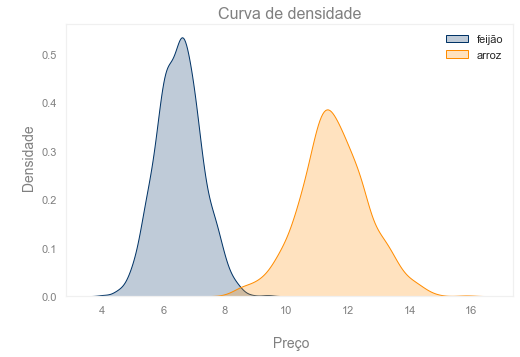

In [76]:
largura = 8 # Largura do gráfico
altura = 5 # Altura do gráfico

# Definindo o estilo do gráfico
sns.set(style="white") 
plt.rcParams['font.sans-serif'] = 'Arial' # Estilo de fonte
font_style = 'Arial' # Estilo de fonte

# Configurando dimensão do gráfico
fig, ax = plt.subplots(figsize=(largura, altura))

# Plotando os gráficos
sns.kdeplot(X, color='#003366', fill=True, label='feijão')
sns.kdeplot(y, color='#FF8C00', fill=True, label='arroz')

# Configuração de texto - títulos e eixos
plt.title('Curva de densidade', fontsize=16, color='gray')
ax.set_ylabel('\n Densidade', fontsize=14, color='gray')
ax.set_xlabel('\n Preço', fontsize=14, color='gray')

ax.spines['top'].set_color('#F0F0F0')
ax.spines['right'].set_color('#F0F0F0')
ax.spines['left'].set_color('#F0F0F0')
ax.spines['bottom'].set_color('#F0F0F0')

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

ax.legend(frameon=False)

plt.show()

<strong>
    Conclusão:
</strong>

<p>
    Esse gráfico confirma que o preço do arroz é superior ao do feijão ao longo da base de dados.
</p>

In [77]:
# Observando correlação
df.corr()

,feijao,arroz
feijao,1.000000,0.620341
arroz,0.620341,1.000000


<strong>
    Conclusão:
</strong>

<p>
    Ocorre correlação significativa entre o preço de ambos os produtos.
</p>

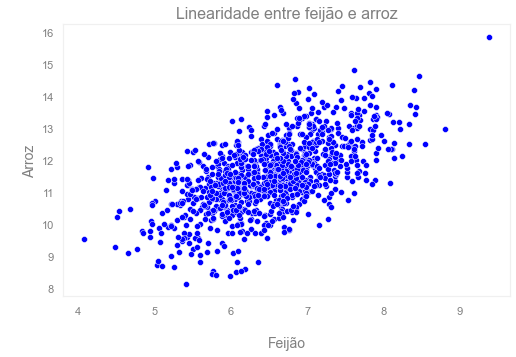

In [78]:
# Definido tamanho do gráfico
largura = 8
altura = 5

# Configuração tipo de fonte
plt.rcParams['font.sans-serif'] = 'Arial'

# Aplicando dimensão do gráfico
fig, ax = plt.subplots(figsize=(largura, altura))

# Plotando dados
sns.scatterplot(data=df, x='feijao', y='arroz', color='blue')

# Renomeações de título e eixos
plt.title('Linearidade entre feijão e arroz', fontsize=16, color='gray')
ax.set_ylabel('\nArroz', fontsize=14, color='gray')
ax.set_xlabel('\nFeijão', fontsize=14, color='gray')

# Configurando cores das bordas
ax.spines['top'].set_color('#F0F0F0')
ax.spines['right'].set_color('#F0F0F0')
ax.spines['left'].set_color('#F0F0F0')
ax.spines['bottom'].set_color('#F0F0F0')

# Configurando cores dos valores dos eixos
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.show()

<strong>
    Conclusão:
</strong>

<p>
    Confirma-se a linearidade entre o preço dos produtos.
</p>

<strong style="color: #800000; font-size: 18px">
    Normalidade dos dados
</strong>

<p>
    Nessa etapa, busca-se compreensão da distribuição dos dados referente a curva normal.
</p>

In [79]:
# Importação dos testes de normalidade
from scipy.stats import shapiro, kstest, anderson

In [80]:
# Testando normalidade dos dados - FEIJÃO

# Executando
estat_shapiro, p_valor_shapiro = shapiro(X) # Shapiro-Wilk
estat_kstest, p_valor_kstest = kstest(X, 'norm') # KS-Teste
resultado_anderson = anderson(X, dist='norm') # Anderson-Darling

# Interpretação Shapiro-Wilk
if p_valor_shapiro > 0.05:
    print("Shapiro-Wilk: Os dados parecem normalmente distribuídos.")
else:
    print("Shapiro-Wilk: Os dados não seguem uma distribuição normal.")
    
# Interpretação KS-teste
if p_valor_kstest > 0.05:
    print("KS: Os dados parecem normalmente distribuídos.")
else:
    print("KS: Os dados não seguem uma distribuição normal.")
    
print('\nAnderson-Darling:')
# Interpretação Anderson-Darling
for i in range(len(resultado_anderson.critical_values)):
    nivel_significancia, valor_critico = resultado_anderson.significance_level[i], resultado_anderson.critical_values[i]
    if resultado_anderson.statistic < valor_critico:
        print(f"Para {nivel_significancia}% de significância: Os dados parecem normalmente distribuídos.")
    else:
        print(f"Para {nivel_significancia}% de significância: Os dados NÃO seguem uma distribuição normal.")

Shapiro-Wilk: Os dados parecem normalmente distribuídos.
KS: Os dados não seguem uma distribuição normal.

Anderson-Darling:
Para 15.0% de significância: Os dados parecem normalmente distribuídos.
Para 10.0% de significância: Os dados parecem normalmente distribuídos.
Para 5.0% de significância: Os dados parecem normalmente distribuídos.
Para 2.5% de significância: Os dados parecem normalmente distribuídos.
Para 1.0% de significância: Os dados parecem normalmente distribuídos.


<strong>
    Conclusão:
</strong>

<p>
    De acordo com os três testes, preço do feijão segue uma distribuição normal.
</p>

In [81]:
# Testando normalidade dos dados - ARROZ

# Executando
estat_shapiro, p_valor_shapiro = shapiro(y) # Shapiro-Wilk
estat_kstest, p_valor_kstest = kstest(y, 'norm') # KS-Teste
resultado_anderson = anderson(y, dist='norm') # Anderson-Darling

# Interpretação Shapiro-Wilk
if p_valor_shapiro > 0.05:
    print("Shapiro-Wilk: Os dados parecem normalmente distribuídos.")
else:
    print("Shapiro-Wilk: Os dados não seguem uma distribuição normal.")
    
# Interpretação KS-teste
if p_valor_kstest > 0.05:
    print("KS: Os dados parecem normalmente distribuídos.")
else:
    print("KS: Os dados não seguem uma distribuição normal.")
    
print('\nAnderson-Darling:')
# Interpretação Anderson-Darling
for i in range(len(resultado_anderson.critical_values)):
    nivel_significancia, valor_critico = resultado_anderson.significance_level[i], resultado_anderson.critical_values[i]
    if resultado_anderson.statistic < valor_critico:
        print(f"Para {nivel_significancia}% de significância: Os dados parecem normalmente distribuídos.")
    else:
        print(f"Para {nivel_significancia}% de significância: Os dados NÃO seguem uma distribuição normal.")

Shapiro-Wilk: Os dados não seguem uma distribuição normal.
KS: Os dados não seguem uma distribuição normal.

Anderson-Darling:
Para 15.0% de significância: Os dados NÃO seguem uma distribuição normal.
Para 10.0% de significância: Os dados NÃO seguem uma distribuição normal.
Para 5.0% de significância: Os dados NÃO seguem uma distribuição normal.
Para 2.5% de significância: Os dados NÃO seguem uma distribuição normal.
Para 1.0% de significância: Os dados NÃO seguem uma distribuição normal.


<strong>
    Conclusão:
</strong>

<p>
    De acordo com os três testes, o preço do arroz não segue uma distribuição normal.
</p>

<strong style="color: #800000; font-size: 20px">
    2. Treinamento do modelo
</strong>

<p>
    Nessa etapa, separa-se o conjunto de dados em treinamento e teste.
    A parte de treinamento servirá para treinar o modelo. A parte de teste, para validação mais a frente.
</p>

In [82]:
# Separação dos dados em treinamento e teste
from sklearn.model_selection import train_test_split

In [83]:
# Criando separaçao entre preditores e respostas em matrizes e vetores de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# 800 dados para treinamento e 200 para teste (validação)
X_treinamento.shape, X_teste.shape, y_treinamento.shape, y_teste.shape

((800,), (200,), (800,), (200,))

<strong style="color: #800000; font-size: 18px">
    Treinamento do modelo
</strong>

<p>
    Inicialmente, importa-se:
       
    1. algoritmo proposto;
    2. algoritmo do pacote scikit-learn para comparação dos resultados;
    3. métricas do scikit-learn para validação das métricas no pacote proposto.
</p>

In [85]:
# Importando classe Regressão Linear BRC e Scikit-Learn
from modelo_regressao_linear_brasil import RegressaoLinearBRC
from sklearn.linear_model import LinearRegression

# Importando métricas do sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
# Instanciando modelo BRC
modelo_brc = RegressaoLinearBRC()

In [87]:
# Realizando ajuste do modelo BRC
modelo_brc.ajuste(X_treinamento, y_treinamento)

array([5.56493458, 0.91744177])

In [125]:
# Equação do modelo
modelo_brc.equacao()

'5.564934583749978 + 0.9174417727028592 * X1'

<strong style="color: #800000; font-size: 18px">
    Predição
</strong>

<p>
    Após treinamento, ocorre a predição a partir dos dados de teste.
</p>

In [129]:
# Predição
y_pred = modelo_brc.predizer(X_teste)

<strong style="color: #800000; font-size: 20px">
    3. Validação do modelo
</strong>

<p>
    Nessa etapa, utiliza-se as métricas presentes na classe proposta e as métricas do scikit-learn.
    Mais a frente, observa-se os valores do modelo proposto com o modelo LinearRegression do scikit-learn.
</p>

<strong style="color: #800000; font-size: 18px">
    3.1 Pelas métricas
</strong>

In [89]:
# Análise das métricas BRC vs SkLearn - MAE
print('MAE - SkLearn: ', mean_absolute_error(y_pred, y_teste))
print('MAE - BRC: ', modelo_brc.erro_absoluto_medio(y_teste))

MAE - SkLearn:  0.693203344861867
MAE - BRC:  0.693203344861867


<strong>
    Conclusão - Erro Absoluto Médio (MAE):
</strong>

<p>
    O resultado do MAE presente na classe proposta está igual ao MAE do scikit-learn.
</p>

In [90]:
# Análise das métricas BRC vs SkLearn - MSE
print('MSE - SkLearn: ', mean_squared_error(y_pred, y_teste))
print('MSE - BRC: ', modelo_brc.erro_quadrado_medio(y_teste))

MSE - SkLearn:  0.7817304374902342
MSE - BRC:  0.7817304374902342


<strong>
    Conclusão - Erro Quadrado Médio (MSE):
</strong>

<p>
    O resultado do MSE presente na classe proposta está igual ao MSE do scikit-learn.
</p>

In [91]:
# Análise das métricas BRC vs SkLearn - MSE
print('RMSE - SkLearn: ', np.sqrt(mean_squared_error(y_pred, y_teste)))
print('RMSE - BRC: ', modelo_brc.raiz_quadrada_erro_quadrado_medio(y_teste))

RMSE - SkLearn:  0.8841552111989355
RMSE - BRC:  0.8841552111989355


<strong>
    Conclusão - Raiz do Erro Quadrado Médio (RMSE):
</strong>

<p>
    O resultado do RMSE presente na classe proposta está igual ao RMSE do scikit-learn.
</p>

In [92]:
# Análise das métricas BRC vs SkLearn - R²
print('R² - SkLearn: ', r2_score(y_teste, y_pred))
print('R² - BRC: ', modelo_brc.r_quadrado(y_teste))

R² - SkLearn:  0.4187473277371824
R² - BRC:  0.4187473277371824


<strong>
    Conclusão - R²:
</strong>

<p>
    O resultado do R² presente na classe proposta está igual ao R² do scikit-learn.
</p>

In [93]:
# Análise das métricas BRC vs SkLearn - R² ajustado

# Definindo valores para R² ajustado SkLearn
n = len(X_teste)  # Número de observações
p = 1  # Número de preditores

# Cálculo R² ajustado SkLearn
r2_score_sklearn =  r2_score(y_teste, y_pred)
r2_ajustado = 1 - (1 - r2_score_sklearn) * (n - 1) / (n - p - 1)

print('R² Ajustado - SkLearn: ', r2_ajustado)
print('R² Ajustado - BRC: ', modelo_brc.r_quadrado_ajustado(y_teste, 1))

R² Ajustado - SkLearn:  0.41581170818029944
R² Ajustado - BRC:  0.41581170818029944


<strong>
    Conclusão - R²-Ajustado:
</strong>

<p>
    O resultado do R²-Ajustado presente na classe proposta está igual ao R²-Ajustado do scikit-learn.
</p>

<strong style="color: #800000; font-size: 18px">
    3.2 Pelo algoritmo LinearRegression do Scikit-Learn
</strong>

<strong style="color: #800000; font-size: 16px">
    Treinamento
</strong>

In [94]:
# Instanciando classe SkLearn
modelo_sklearn = LinearRegression()

In [132]:
# Ajustando modelo sklearn
modelo_sklearn.fit(X_treinamento.reshape(-1,1), y_treinamento)

LinearRegression()

<strong style="color: #800000; font-size: 16px">
    Predição
</strong>

In [133]:
# Predizendo sklearn
y_pred_sklearn = modelo_sklearn.predict(X_teste.reshape(-1,1))

<strong style="color: #800000; font-size: 16px">
    Comparação da predição de cada modelo (Proposto x Scikit-Learn)
</strong>

In [137]:
# Análise das métricas BRC vs SkLearn - MAE
print('MAE - SkLearn: ', mean_absolute_error(y_pred_sklearn, y_teste).round(4))
print('MAE - BRC: ', modelo_brc.erro_absoluto_medio(y_teste).round(4))

# Resultado MODELO BRUNO X MODELO SCIKIT-LEARN
print('\nDiferença: ', modelo_brc.erro_absoluto_medio(y_teste).round(4) - mean_absolute_error(y_pred_sklearn, y_teste).round(4))

MAE - SkLearn:  0.6932
MAE - BRC:  0.6932

Diferença:  0.0


<strong>
    Conclusão - Erro Absoluto Médio (MAE):
</strong>

<p>
    Ambos os modelos tiveram mesmo resultado.
</p>

In [138]:
# Análise das métricas BRC vs SkLearn - MSE
print('MSE - SkLearn: ', mean_squared_error(y_pred_sklearn, y_teste).round(4))
print('MSE - BRC: ', modelo_brc.erro_quadrado_medio(y_teste).round(4))

# Resultado MODELO BRUNO X MODELO SCIKIT-LEARN
print('\nDiferença: ', modelo_brc.erro_quadrado_medio(y_teste).round(4) - mean_squared_error(y_pred_sklearn, y_teste).round(4))

MSE - SkLearn:  0.7817
MSE - BRC:  0.7817

Diferença:  0.0


<strong>
    Conclusão - Erro Quadrado Médio (MSE):
</strong>

<p>
    Ambos os modelos tiveram mesmo resultado.
</p>

In [146]:
# Análise das métricas BRC vs SkLearn - RMSE
print('RMSE - SkLearn: ', np.sqrt(mean_squared_error(y_pred_sklearn, y_teste)).round(4))
print('RMSE - BRC: ', modelo_brc.raiz_quadrada_erro_quadrado_medio(y_teste).round(4))

# Resultado MODELO BRUNO X MODELO SCIKIT-LEARN
print('\nDiferença: ', modelo_brc.raiz_quadrada_erro_quadrado_medio(y_teste).round(4) - np.sqrt(mean_squared_error(y_pred_sklearn, y_teste)).round(4))

RMSE - SkLearn:  0.8842
RMSE - BRC:  0.8842

Diferença:  0.0


<strong>
    Conclusão - Raiz Erro Quadrado Médio:
</strong>

<p>
    Ambos os modelos tiveram mesmo resultado.
</p>

In [147]:
# Análise das métricas BRC vs SkLearn - R²
print('R² - SkLearn: ', r2_score(y_teste, y_pred_sklearn).round(4))
print('R² - BRC: ', modelo_brc.r_quadrado(y_teste).round(4))

# Resultado MODELO BRUNO X MODELO SCIKIT-LEARN
print('\nDiferença: ', modelo_brc.r_quadrado(y_teste).round(4) - r2_score(y_teste, y_pred_sklearn).round(4))

R² - SkLearn:  0.4187
R² - BRC:  0.4187

Diferença:  0.0


<strong>
    Conclusão - R²:
</strong>

<p>
    Ambos os modelos tiveram mesmo resultado.
</p>

In [148]:
# Análise das métricas BRC vs SkLearn - R² ajustado

# Definindo valores para R² ajustado SkLearn
n = len(X_teste)  # Número de observações
p = 1  # Número de preditores

# Cálculo R² ajustado SkLearn
r2_score_sklearn =  r2_score(y_teste, y_pred_sklearn)
r2_ajustado = 1 - (1 - r2_score_sklearn) * (n - 1) / (n - p - 1)

print('R² Ajustado - SkLearn: ', r2_ajustado.round(4))
print('R² Ajustado - BRC: ', modelo_brc.r_quadrado_ajustado(y_teste, 1).round(4))
print('\nDiferença: ', modelo_brc.r_quadrado_ajustado(y_teste, 1).round(4) - r2_ajustado.round(4))

R² Ajustado - SkLearn:  0.4158
R² Ajustado - BRC:  0.4158

Diferença:  0.0


<strong>
    Conclusão - R²-Ajustado:
</strong>

<p>
    Ambos os modelos tiveram mesmo resultado.
</p>

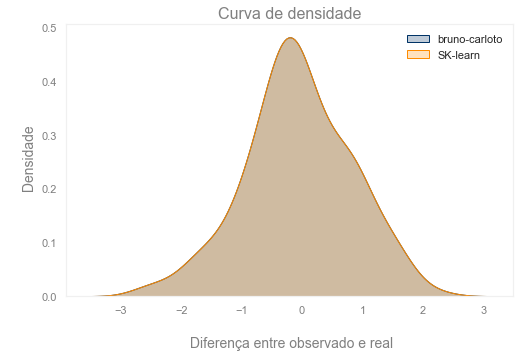

In [102]:
largura = 8 # Largura do gráfico
altura = 5 # Altura do gráfico

# Definindo o estilo do gráfico
sns.set(style="white") 
plt.rcParams['font.sans-serif'] = 'Arial' # Estilo de fonte
font_style = 'Arial' # Estilo de fonte

# Configurando gráfico
fig, ax = plt.subplots(figsize=(largura, altura))

# Plotando a diferença entre observado Bruno e real
sns.kdeplot((y_teste - y_pred), color='#003366', fill=True, label='bruno-carloto')

# Plotando a diferença entre observado Scikit-Learn e real
sns.kdeplot((y_teste - y_pred_sklearn), color='#FF8C00', fill=True, label='SK-learn')

# Configurando títulos dos eixos
plt.title('Curva de densidade', fontsize=16, color='gray')
ax.set_ylabel('\n Densidade', fontsize=14, color='gray')
ax.set_xlabel('\n Diferença entre observado e real', fontsize=14, color='gray')

# Parametrizando bordas
ax.spines['top'].set_color('#F0F0F0')
ax.spines['right'].set_color('#F0F0F0')
ax.spines['left'].set_color('#F0F0F0')
ax.spines['bottom'].set_color('#F0F0F0')

# Parametrizando eixos
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

# Ajuste de legenda
ax.legend(frameon=False)

plt.show()

<strong>
    Conclusão:
</strong>

<p>
    Os resíduos estão distribuidos muitíssimo similarmente.
</p>